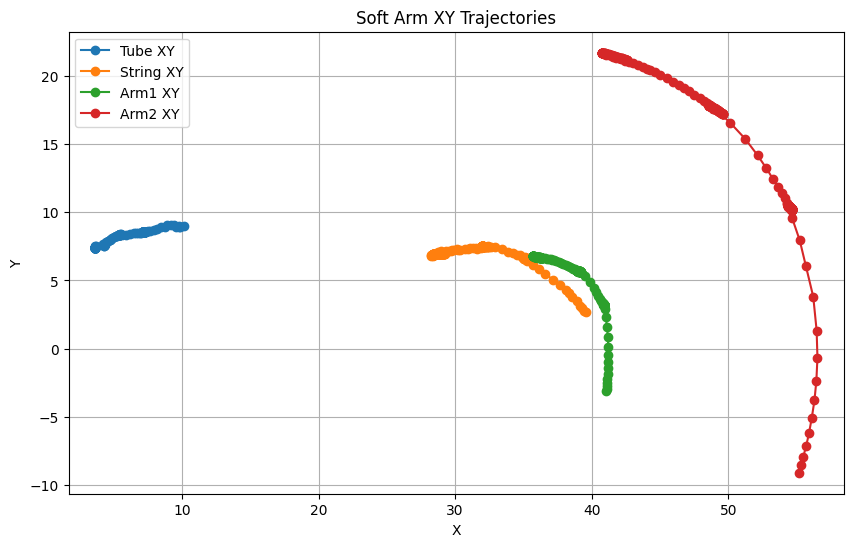

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('softarm.csv')

# Plot tube, string, and arm tip XY positions over time if available
plt.figure(figsize=(10, 6))

plt.plot(df['tube_x'], df['tube_y'], 'o-', label='Tube XY')
plt.plot(df['string_x'], df['string_y'], 'o-', label='String XY')
plt.plot(df['arm1_x'], df['arm1_y'], 'o-', label='Arm1 XY')
plt.plot(df['arm2_x'], df['arm2_y'], 'o-', label='Arm2 XY')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Soft Arm XY Trajectories')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


Arm angle crosses zero at time t = 1.8361 s
index 8


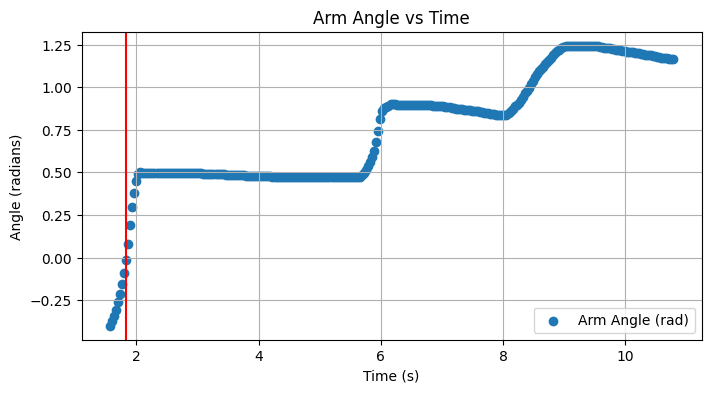

In [17]:
import numpy as np
armx = df['arm2_x']-df['arm1_x']
army = df['arm2_y']-df['arm1_y']
armangle = np.arctan2(army, armx)
plt.figure(figsize=(8,4))
plt.scatter(df['t'], armangle, label='Arm Angle (rad)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.title('Arm Angle vs Time')
plt.grid(True)
plt.legend()

zero_idx = 0
crossings = np.where(np.diff(np.sign(armangle)) != 0)[0]
for idx in crossings:
    # Linear interpolation for better crossing estimate
    t0, t1 = df['t'].iloc[idx], df['t'].iloc[idx+1]
    a0, a1 = armangle[idx], armangle[idx+1]
    if a1 != a0:
        zero_cross_time = t0 - a0 * (t1 - t0) / (a1 - a0)
    else:
        zero_cross_time = t0
    print(f"Arm angle crosses zero at time t = {zero_cross_time:.4f} s")
    print(f"index {idx}")
    zero_idx = idx

plt.gca().axvline(zero_cross_time, color='red')


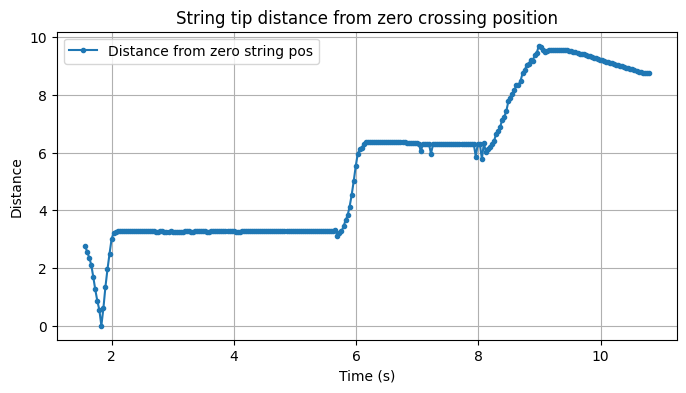

In [24]:
zero_string_pos = np.array([df['string_x'][zero_idx], df['string_y'][zero_idx]])
string_pos = np.vstack([df['string_x'], df['string_y']]).T
dist_from_zero = np.linalg.norm(string_pos - zero_string_pos, axis=1)
plt.figure(figsize=(8,4))
plt.plot(df['t'], dist_from_zero, marker='o', markersize=3, label='Distance from zero string pos')
plt.xlabel('Time (s)')
plt.ylabel('Distance')
plt.title('String tip distance from zero crossing position')
plt.grid(True)
plt.legend()
plt.show()

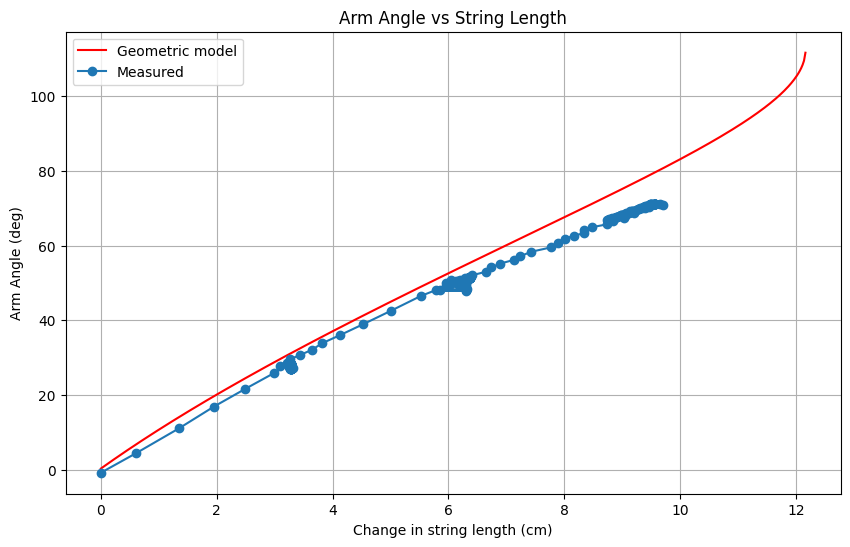

In [52]:
plt.figure(figsize=(10,6))
mask = df['t']+0.01 >= zero_cross_time

a, b, r = 11, 5.5, 5.1
s = np.linspace(0, 12.165, 500)

theta_r_s = np.arccos(((a+b-s)**2 - a**2 - b**2 - 2*r**2) / (2 * np.sqrt((a**2 + b**2) * (b**2 + r**2)))) - np.arctan(r/a) - np.arctan(r/b)
plt.plot(s, np.degrees(theta_r_s), linestyle='-', color='red', label='Geometric model')

plt.plot(dist_from_zero[mask], np.degrees(armangle[mask]), marker='o', linestyle='-', color='tab:blue', label='Measured')



plt.xlabel('Change in string length (cm)')
plt.ylabel('Arm Angle (deg)')
plt.title('Arm Angle vs String Length')
plt.grid(True)
plt.legend()


# plt.xlim(-0.1, 0.1)
# plt.ylim(-0.1, 0.1)


In [50]:
armangle[mask]

8     -0.013653
9      0.077377
10     0.193235
11     0.295368
12     0.376918
         ...   
273    1.171938
274    1.168618
275    1.167268
276    1.167874
277    1.167463
Length: 270, dtype: float64

In [49]:
theta_r_s

array([0.00577889, 0.11835807, 0.24569249, 0.34386295, 0.42637089,
       0.5016824 , 0.53634988, 0.53752161, 0.54387163, 0.54419447,
       0.54430183, 0.54413262, 0.54411086, 0.54419511, 0.5441335 ,
       0.54392218, 0.54375726, 0.54379699, 0.54382465, 0.54357399,
       0.54368446, 0.54376615, 0.54387827, 0.54256173, 0.54288641,
       0.54252076, 0.54225988, 0.54173293, 0.54170135, 0.54205194,
       0.54231744, 0.5417859 , 0.54126506, 0.54177126, 0.54214773,
       0.54149762, 0.54039938, 0.54115303, 0.54118461, 0.5412889 ,
       0.54126574, 0.54191915, 0.54216373, 0.5423714 , 0.54166175,
       0.54186481, 0.5419012 , 0.54195505, 0.54189263, 0.54201159,
       0.54199573, 0.54201067, 0.54181515, 0.54170992, 0.54192065,
       0.54212462, 0.54203425, 0.54253965, 0.54262911, 0.54271043,
       0.54243607, 0.542234  , 0.54256267, 0.54277723, 0.54232872,
       0.54204536, 0.5417755 , 0.54178538, 0.54185328, 0.54231511,
       0.5425942 , 0.54246467, 0.54241164, 0.54216002, 0.54252